<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 10px;">

# Intro to Hierarchical Clustering
Week 7 | Lesson 3.2

![](https://snag.gy/J8iyBj.jpg)

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Perform a Hierarchical Clustering
- Plot, Analyze, and Understand the Dendrogram
- Evaluate clusters for fit 

### STUDENT PRE-WORK
*Before this lesson, you should already be able to:*
- Perform clustering analyses in python
- Have a working knowledge of Pandas and SciPy

### LESSON GUIDE
| TIMING  | TYPE  | TOPIC  |
|:-:|---|---|
| 5 min  | [Opening](#opening)  | Opening |
| 10 min  | [Introduction](#introduction)   | What is Hierarchical Clustering?  |
| 15 min  | [Demo](#demo)  | Example of Hierarchical Clustering  |
| 25 min  | [Guided Practice](#guided-practice<a name="opening"></a>)  | Hierarchical Clustering in Python |
| 25 min  | [Independent Practice](#ind-practice)  | Implement hierarchical clustering
| 5 min  | [Conclusion](#conclusion)  | Conclusion  |

---

## How have we successfully used K-Means?

Will you use it in your capstone at all?

# Opening

- Hierarchical clustering works well for non-spherical clusters
- It also works well on smaller datasets - _this algorithm has a longer computational time and doesn't work well for larger datasets_

$$O(n^2 * n\ features)$$

### Hierarchical clustering works well for instances where we are working with observed records. 

For instance - I've tallied the amount of times a certain skill exists in a collection of resumes.  **Since k-means computes *means*, this wouldn't give us very good clusters!**

<a name="introduction"></a>
## Introduction: Intro to Hierarchical Clustering (10 mins)

#### What is Hierarchical Clustering? 

Hierarchical clustering, like k-means clustering, is another common form of clustering analysis. With this type of clustering - we seek to do exactly what the name suggests: 

- Build hierarchies of links
- Form clusters

Once these links are determined, they are displayed in what is called a **dendrogram** - a graph that displays all of these links in a hierarchical manner.

![denex](../assets/images/denex.png)

To find clusters in a dendrogram, we can cut the graph to find the clusters - we'll go over this later in the lesson. 


#### How is Hierarchical Clustering Different from K-Means Clustering?

![](https://snag.gy/tfzWw6.jpg)

Much like we learned about k-means clustering, hierarchical clustering is another method for classifying our data. If you recall, in k-means clustering, the algorithm groups data into a pre-defined set of clusters based on assigning the closest points to centroids, calculating the geometric mean of classified points, then moving the centroid until no points change class.

**However in the case of hierarchical clustering, the algorithm builds classifications trees of the data that merges groups of similar data points.**

With k-means, the boundaries between the various clusters are distinct and independent (see graph), whereas in hierarchical clustering, there are shared similarities between those groups that are represented by the classification tree.  Going further - unlike with k-means, hierarchical clustering does not require you to define "k" as an input.

![kmeans](../assets/images/kmeans.png)

All of these attributes can lend themselves to certain clustering situations - for instance, hierarchical clustering is more beneficial for smaller datasets - think about the complexity of a dendrogram from a 1000 point dataset! Likewise, this form of clustering works better when we have binary data or dummy variables: as k-means computes *means* in forming clusters, performing k-means on a dataset with a significant amount of variables would skew the resulting clusters and distributions. 



### What is the difference?

**Generally, K-Means looks to achieve seperation**
- Partitions are independent of each other

**Hierachical Clustering**
- Partitions can be visualized using a tree structure (a dendrogram)
- Does not need the number of clusters as input (no random initialization)
- Possible to view partitions at different levels of granularities (i.e., can refine/coarsen clusters) using different K
- Will converge at the same solution


## How is clustering different from classification? When might we use one over the other? 

<a name="demo"></a>
## How Does Hierarchical Clustering Work? - Demo (10 mins)

In hierarchical clustering, instead of clustering in one step, the clusters are determined in the a varying number of partitions. At each step, it makes the best choice based on the surrounding datapoints, with the ultimate goal that these best choices will lead to the best choice of clusters overall. Given the algorithm's method of calculating linkages based on immediate datapoints, it's known as a **greedy algorithm**.

There are two forms of hierarchical clustering; **agglomerative hierarchical clustering** and **divisive hierarchical clustering**.

![](../assets/images/hier.png)

Today, we're going to look at one of the most fundamental methods for agglomerative hierarchical cluster, known as **linkage clustering**. Linkage clustering iterates through datapoints and computes the distance between groups by computing the distance between two neighboring datapoints, using the **nearest neighbor** technique similar to KNN.

### Divisive
- Start at the trunk of the tree and build the leaves

### Agglomerative
- Start with the leaves of the tree and build the trunk

_A **greedy algorithm** is an algorithm that follows the problem solving heuristic of making the locally optimal choice at each stage with the hope of finding a global optimum._

## "Single Linkage" Step by Step
(Aggomerative)


Also known as "single linkage", minimum distance clustering or nearest neighbor clustering.


<table>
    <tr>
        <td>![](https://snag.gy/SDZyGz.jpg)</td>
        <td>Distance between two clusters is defined by the minimum distance between objects of the two clusters. 
</td>
    </tr>
        
</table>



### First let's consider a single series of distances between X/Y points in 2D space, represented as a matrix.
<table>
    <tr>
        <td>![](https://snag.gy/EcRNns.jpg)</td>
        <td>
        <ul><li>_Each feature, A-F, would be considered a "cluster".  All points are clusters._</li>
        <li>In each step of the iteration, we find the closest pair clusters.</li>
        <li>Our end goal is to ultimately cluster all of these to one single cluster.</li>
        <li>**In this case, the closest cluster is between cluster F and D with shortest distance of 0.5.**</li>
        </ul>
        <br>
        **Thus, we group cluster D and F into cluster (D, F)**
        </td>
    </tr>
        
</table>








<table>
    <tr>
        <td width="350">![](https://snag.gy/siCURp.jpg)</td>
        <td>
        <li>D and F turn into a cluster</li>
        <li>Distance matrix is updated (distance between ungrouped clusters do not change)</li>
        <br>
        **Now the problem is how to calculate distance between newly grouped clusters (D, F) and other clusters?**
        </td>
    </tr>
        
</table>

<table>
    <tr>
        <td width="350">![](https://snag.gy/lXQDf2.jpg)</td>
        <td>This is where our linkage function starts to do some work.
        <br>
        <ul>
            <li>Using single linkage, we specify minimum distance between original objects of the two clusters.</li>
            <li>Using single linkage, we find the minimum point from cluster $_{df}$ to all other "clusters"</li>
            <ol>$d(d,f)\rightarrow a = min(d_{DA}, d_{FA}) = min(3.61, 3.20) = 3.20$</ol>
            <ol>$d(d,f)\rightarrow b = min(d_{DB}, d_{FB}) = min(2.92, 2.50) = 2.50$</ol>
            <ol>$d(d,f)\rightarrow c = min(d_{DC}, d_{FC}) = min(2.24, 2.50) = 2.24$</ol>
            <ol>$d(d,f)\rightarrow e = min(d_{DE}, d_{FE}) = min(1.00, 1.12) = 1.00$</ol>
        </ul>
        </td>
    </tr>

</table>





<table>
    <tr>
        <td width="350">![](https://snag.gy/syM7BH.jpg)</td>
        <td>**Cluster B and cluster A is now 0.71, wich creats cluster name "(A, B)"**
        <br>
        <ul>
            <li>Now we update the distance matrix. </li>
            <li>Using the **original** input distance matrix (size 6 by 6), distance between cluster C and cluster (D, F) is computed as </li>
            <ol>$d_{(c)\rightarrow (a,b)} = min(d_{CA}, d_{CB}) = min(5.66, 4.95) = 4.95$<br><br></ol>
            <li>Distance between cluster (D, F) and cluster (A, B) is the minimum distance between all objects involves in the two clusters </li>
            <ol>$d_{(d,f)\rightarrow (a,b)} = min(d_{DA}, d_{DB}, d_{FA}, d_{FB}) = min(2.61, 2.92, 3.20, 2.50) = 2.50$<br><br></ol>
            <li>Now we compute $e$ and $(a,b)$</li>
            <ol>$d(e)\rightarrow (a,b) = min(d_{E}, d_{AB}) = min(4.24, 3.54) = 3.54$</ol>
        </ul>
        </td>
    </tr>

</table>

<table>
    <tr>
        <td width="350">![](https://snag.gy/Tg4V6J.jpg)</td>
        <td>**Here's our updated distance matrix**
        <ol>$d_{((D,F),E)\rightarrow(AB)} = MIN(d_{DA},d_{DB},d_{FA},d_{FB},d_{EB}) = MIN(3.61, 2.92, 3.20, 2.50, 4.24, 3.54) = 2.50$</ol>
        <ol>$d_{(D,F), E)\rightarrow C} = MIN(d_{DF}, d_{FC}, d_{EC}) = MIN(2.24,2.50,1.41) = 1.41$</ol>
        </td>
    </tr>
</table>

![](https://snag.gy/lrdR8b.jpg)
<ol>$d_{(((D,F), E),C)\rightarrow(A, B)} = MIN(d_{DA},d_{DB},d_{FA}, d_{FB}, d_{EA}, d_{EB}, d_{CA}, d_{CB})$</ol>
<ol>$d_{(((D,F), E),C)\rightarrow(A, B)} = MIN(3.61,2.92,3.20,2.50,4.24,3.54, 5.66, 4.95) = 2.50$</ol>

<ol>

          <li>In the beginning we have 6 clusters: A, B, C, D, E and F </li>

          <li>We merge cluster D and F into cluster (D, F) at distance<strong> 0.50</strong> </li>

          <li>We merge cluster A and cluster B into (A, B) at distance <strong>0.71</strong> </li>

          <li>We merge cluster E and (D, F) into ((D, F), E) at distance <strong>1.00</strong> </li>

          <li>We merge cluster ((D, F), E) and C into (((D, F), E), C) at distance <strong>1.41</strong> </li>

          <li>We merge cluster (((D, F), E), C) and (A, B) into ((((D, F), E), C), (A, B)) at distance <strong>2.50</strong> </li>

          <li>The last cluster contain all the objects, thus conclude the computation </li>

</ol>

<br>
<center>**Our final result, can be represented in terms of a dendogram such as:**</center>

![](https://snag.gy/NJ2lxe.jpg)

#### Hierarchical Clustering in Python

Implementing hierarchical clustering in python is as simple as calling a function from the SciPy toolbox:

```python
Z = linkage(X, 'ward')
```

Here, "X" represents the matrix of data that we are clustering, and "ward" tells our algorithm which method to use to calculate distance between our newly formed clusters - in this case **Ward's Method** which seeks to minimize the variance when forming clusters. When calculating distance, the default is **Euclidean distance**.

After we cluster, we can calculate the dendrogram using a simple ```dendrogram()``` function from SciPy, which we can then draw using our handy  ```plt``` from matplotlib. 

To check how well our algorithm has measured distance, we can calculate the **cophenetic correlation coefficient**. This metric, which measures the height of the dendrogram at the point where two branches merge, can tell us how well the dendrogram has measured the distance between data points in the original dataset and is a helpful measure to see how well our clustering test has run. 

```python
c, coph_dists = cophenet(Z, pdist(X))
```

Here, we call the cophenetic function using ```cophenet``` from SciPy and apply it to our clustered set, Z, and the distance of our original set, X. 

## Briefly:  Cophenetic Coefficient Intuition

$$
c = \frac {\sum_{i<j} (x(i,j) - \bar{x})(t(i,j) - \bar{t})}{\sqrt{[\sum_{i<j}(x(i,j)-\bar{x})^2] [\sum_{i<j}(t(i,j)-\bar{t})^2]}}.
$$[Detailed Cophenetic Coefficient Calculation](https://en.wikipedia.org/wiki/Cophenetic_correlation#Calculating_the_cophenetic_correlation_coefficient)

- Based on interpoint distance within clusters
- Considers $MIN(C_i)$ when looking at distance between clusters (product moment correlation)
- Values closer to $1$ are considered good in terms of "fusion" (how well clusters sit with each other)

## What other metrics have we used?

_Follow up:  Generally, what is good or bad about clusters?_

<a name="guided-practice"></a>
## Guided Practice: Preparing Your Analysis & Handling Data (15 mins)

Let's say that you're asked to perform hierarchical clustering analysis on a new dataset - how would we go about it?
We're going to be using a dataset that details language skills from different European countries. We will perform a hierarchical clustering analysis on this dataset.

**Check**: Can you think of some other examples for how this type of data could be used?

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os

%matplotlib inline

We're going to be using **scipy** for our analysis. Let's load in the dataset using Pandas ```read.csv()``` and check the head to see it's structure

In [3]:
lang = pd.read_csv("../assets/datasets/lang.csv")
lang.head()

,country,finnish,swedish,danish,norwegian,english,german,dutch,flemish,french,italian,spanish,portuguese
0,1,0,0,0,0,21,100,2,1,10,2,1,0
1,2,0,0,0,0,5,3,0,0,11,100,1,0
2,3,0,2,3,0,10,7,1,1,100,12,7,1
3,4,0,0,0,0,41,47,100,100,16,2,2,0
4,5,0,0,0,0,14,15,0,59,44,2,1,0


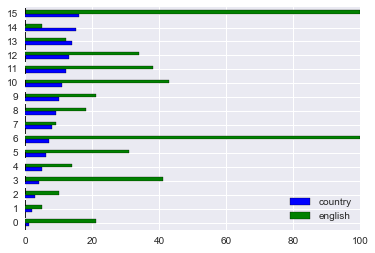

In [79]:
# lang[['country', 'english']].plot(kind="scatter", x="country", y="english")
lang[['country', 'english']].plot(kind="barh")

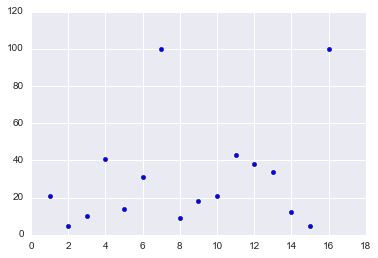

In [4]:
# How many clusters does it look like we have?
plt.scatter(lang['country'], lang['english'])
plt.show()

Now, let's convert our data to a matrix (aka array) to pass to the clustering algorithm - the matrix makes it easier for our algorithm to compute distance:

In [6]:
X = lang.as_matrix(columns=None)

Next, we'll implement the actual clustering algorithm using the **`ward`** method (described in detail earlier):

In [8]:
Z = linkage(X, 'ward')

Now, we can calculate the cophenetic correlation coefficient to see how well our algorithm has measured the distances between the points:

In [9]:
c, coph_dists = cophenet(Z, pdist(X))

To see the coefficient, just type in the variable: 

In [10]:
c

0.66645925603242939

You should see a **C** around **0.667**, which means that the distances of the clusters are moderately related to the original distances of the data.

Now, let's plot the dendrogram. To do this, we call dendrogram from  scipy.cluster.hierarchy and input our links, and rotate the labels so we can view the graph in a more organized matter. 

#### We can then plot the denrogram with pyplot from matplotlib.

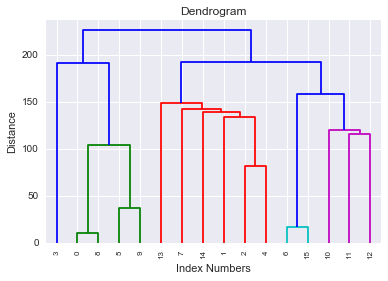

In [11]:
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.show()

Now, we want to determine our clusters. While there are many ways to automate this process,  we're going to help estimate our clusters by visually examining the graph to better understand the structure of the dendrogram. 

Here, we can see that no links exist above a distance of 200 - so we will set maximum distance at 200 and use the ```fclusters``` function from ```scipy.cluster.hierarchy```, which will return our cluster ID's. 

In [17]:
max_dist = 200 # pairwise distance
clusters = fcluster(Z, max_dist, criterion='distance')
clusters

array([1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2], dtype=int32)

Lastly, let's plot our data and assign the class labels as the color:

In [68]:
def plot_dist_threash(max_dist=200):
    #max_dist = 200 # pairwise distance
    clusters = fcluster(Z, max_dist, criterion='distance')
    plt.scatter(X[:,0], X[:,6], c=clusters, cmap='prism', s=40)
    plt.figsize=(10,8)
    plt.title("Max Dist: %d" % max_dist)
    plt.show()

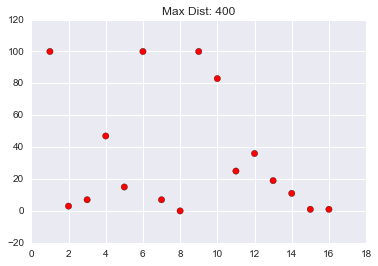

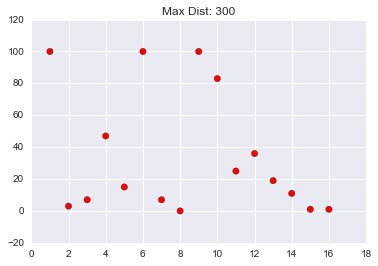

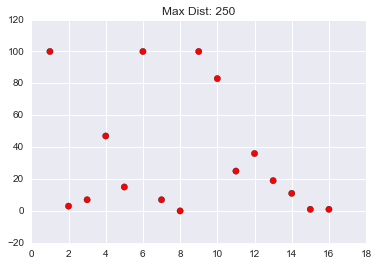

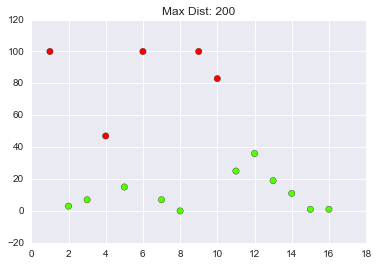

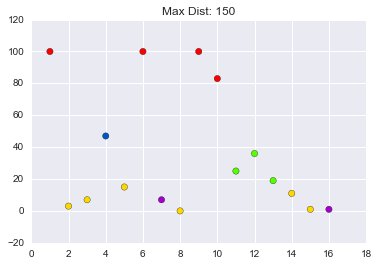

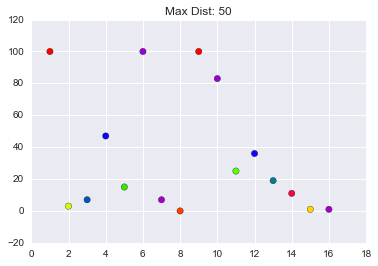

In [69]:
plot_dist_threash(400)
plot_dist_threash(300)
plot_dist_threash(250)
plot_dist_threash(200)
plot_dist_threash(150)
plot_dist_threash(50)

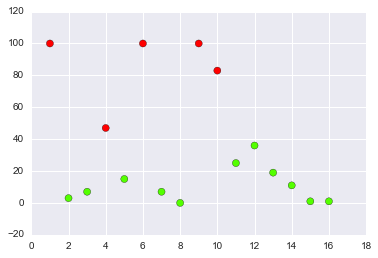

In [70]:
plt.scatter(X[:,0], X[:,6], c=clusters, cmap='prism', s=50)
plt.show()

### Changing our max_dist threashold 
We can see the range of max_dist has on our predicted cluster points and # of clusters found.

In [62]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from ipywidgets import *

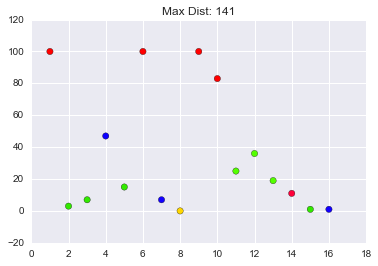

In [73]:
interact(plot_dist_threash, x=400, i=IntSlider(min=1, max=200, step=1))

<a name="ind-practice"></a>
## Independent Practice: Perform a Hierarchical Clustering Analysis (15 minutes)

> Pair or independent activity

Now that we've walked through the process of clustering, it's time to try it on your own. We're going to be working with the iris data set, and your job is to cluster the data to understand their various attributes.

Open the [data](../assets/datasets/iris.csv) and [starter code](../code/starter-code/starter-code.ipynb) and try to work through both exercises.


<a name="conclusion"></a>
## Conclusion (5 mins)
- Recall the definitions of linkage, cophenetic coefficient, and dendrogram
- Recap and recall the process steps in hierachical clustering
    - Linkage: First, we create the linkages in python that form the basis of our analysis
    - Cophenetic Coefficient: We find the cophenetic coefficient to determine how well our analysis is running
    - Dendrogram: We plot the dendrogram and visually inspect the clusters
    - Lastly, we find our cluster ID's and plot

***

## Additional Resources 

- [SciPy Documentation for Linkage techniques](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.cluster.hierarchy.linkage.html)
- [What even is this Hierarchical Clustering Thing, Anyway?](http://www.saedsayad.com/clustering_hierarchical.htm)

### Extra Practice
    
Load up our FAA dataset or Dating Survey Dataset and try to apply heirarchical clustering.